# Introduction
## Comparative Analysis of Cycling Data between Dublin And Seattle
This project analysis and compares cycling data from Dublin and Seattle. The analysis includes data fetching, cleaning, manipulation and visualization. In addition fforecast future cycling trends and provide recommendations based on the analysis.
### Data Sources:
- Dublin Cycling Data: data.gov.ie
- Seattle Cycling Data: data.seattle.gov
### objectives:
1. Compare cycling trends between Dublin and Seattle.
2. Forecast future cycling Trends.
3. Provide evidence based recommendations.

## Programming

In [1]:
import requests  # For making API requests
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
from prophet import Prophet  # For forecasting
import cProfile  # For profiling
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

Justification:

- requests: To fetch data from APIs.
- pandas: For efficient data manipulation and analysis.
- matplotlib: For creating visualizations.
- prophet: For forecasting future trends in cycling data.
- cProfile: For profiling and optimizing code performance

 ## Data from Diverse Sources

### Fetching Seattle Data from API

In [2]:
 #Fetching Seattle Data from API
api_url = "https://data.seattle.gov/resource/65db-xm6k.json"
response = requests.get(api_url)
if response.status_code == 200:
    data = response.json()
    seattle_data_df = pd.json_normalize(data)
    seattle_data_df.to_csv('seattle_cycling_data.csv', index=False)
    print("Seattle data saved to 'seattle_cycling_data.csv'")
else:
    print(f"Failed to fetch Seattle data: {response.status_code}")


Seattle data saved to 'seattle_cycling_data.csv'


### Loading Data from CSV

In [3]:
seattle_data=pd.read_csv("seattle_cycling_data.csv")
dublin_data=pd.read_csv("cycle-counts-1_jan_4_july-2024.csv")

In [4]:
# Display the first few rows to verify the data
print("Seattle Data:")
print(seattle_data.head())

Seattle Data:
                      date  fremont_bridge  fremont_bridge_nb  \
0  2024-06-30T23:00:00.000              18                  9   
1  2024-06-30T22:00:00.000              32                 10   
2  2024-06-30T21:00:00.000              52                 13   
3  2024-06-30T20:00:00.000             121                 37   
4  2024-06-30T19:00:00.000             125                 57   

   fremont_bridge_sb  
0                  9  
1                 22  
2                 39  
3                 84  
4                 68  


In [5]:
print("Dublin Data:")
print(dublin_data.head())

Dublin Data:
               Time  \
0  01/01/2024 00:00   
1  01/01/2024 01:00   
2  01/01/2024 02:00   
3  01/01/2024 03:00   
4  01/01/2024 04:00   

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     
3                                                NaN                                     
4                                                NaN                                     

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  \
0                                                NaN                                                   
1                                                NaN                                               

##  Data Manipulation

## Convert Date/Time Columns to Datetime Format
Justification:

- Converting date/time columns to datetime format is crucial for accurate time series analysis. It allows for easier filtering, aggregation, and comparison of data based on time periods.

In [6]:
# Convert date columns to datetime
seattle_data['date'] = pd.to_datetime(seattle_data['date'], format='%Y-%m-%dT%H:%M:%S.%f')
dublin_data['Time'] = pd.to_datetime(dublin_data['Time'], format='%d/%m/%Y %H:%M')

In [7]:
# Display the first few rows to verify the conversion
print("Seattle Data with Converted Date Column:")
print(seattle_data.head())

Seattle Data with Converted Date Column:
                 date  fremont_bridge  fremont_bridge_nb  fremont_bridge_sb
0 2024-06-30 23:00:00              18                  9                  9
1 2024-06-30 22:00:00              32                 10                 22
2 2024-06-30 21:00:00              52                 13                 39
3 2024-06-30 20:00:00             121                 37                 84
4 2024-06-30 19:00:00             125                 57                 68


In [8]:
print("Dublin Data with Converted Time Column:")
print(dublin_data.head())

Dublin Data with Converted Time Column:
                 Time  \
0 2024-01-01 00:00:00   
1 2024-01-01 01:00:00   
2 2024-01-01 02:00:00   
3 2024-01-01 03:00:00   
4 2024-01-01 04:00:00   

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     
3                                                NaN                                     
4                                                NaN                                     

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  \
0                                                NaN                                                   
1                                                NaN        

## Filter Data to the Overlapping Period
Justification:

- Filtering the data to the overlapping period (May 20, 2024, to June 30, 2024) ensures that we can compare trends between Dublin and Seattle within the same timeframe.

In [9]:
# Define the overlapping period
start_date = '2024-05-20'
end_date = '2024-06-30'

In [10]:
# Filter the Seattle data
seattle_filtered = seattle_data[(seattle_data['date'] >= start_date) & (seattle_data['date'] <= end_date)]

In [11]:
# Filter the Dublin data
dublin_filtered = dublin_data[(dublin_data['Time'] >= start_date) & (dublin_data['Time'] <= end_date)]

In [12]:
# Display the first few rows of the filtered datasets to verify
print("Filtered Seattle Data:")
print(seattle_filtered.head())

Filtered Seattle Data:
                  date  fremont_bridge  fremont_bridge_nb  fremont_bridge_sb
23 2024-06-30 00:00:00              27                  7                 20
24 2024-06-29 23:00:00              15                  5                 10
25 2024-06-29 22:00:00              47                 15                 32
26 2024-06-29 21:00:00              63                 13                 50
27 2024-06-29 20:00:00              85                 21                 64


In [13]:
print("Filtered Dublin Data:")
print(dublin_filtered.head())

Filtered Dublin Data:
                    Time  \
3360 2024-05-20 00:00:00   
3361 2024-05-20 01:00:00   
3362 2024-05-20 02:00:00   
3363 2024-05-20 03:00:00   
3364 2024-05-20 04:00:00   

      Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)  \
3360                                                NaN                                     
3361                                                NaN                                     
3362                                                NaN                                     
3363                                                NaN                                     
3364                                                NaN                                     

      Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  \
3360                                                NaN                                                   
3361                                

## Handling Missing Values
Justification:

- Ensuring data integrity by handling missing values appropriately, either by dropping or filling them

In [14]:
# Drop columns with all NaN values in Dublin data
dublin_filtered_cleaned = dublin_filtered.dropna(axis=1, how='all')


In [15]:
# Display the cleaned Dublin data to verify the changes
print("Cleaned Dublin Data:")
print(dublin_filtered_cleaned.head())

Cleaned Dublin Data:
                    Time  Clontarf - James Larkin Rd  \
3360 2024-05-20 00:00:00                         0.0   
3361 2024-05-20 01:00:00                         1.0   
3362 2024-05-20 02:00:00                         1.0   
3363 2024-05-20 03:00:00                         1.0   
3364 2024-05-20 04:00:00                         3.0   

      Clontarf - James Larkin Rd Cyclist West  \
3360                                      0.0   
3361                                      0.0   
3362                                      1.0   
3363                                      0.0   
3364                                      2.0   

      Clontarf - James Larkin Rd Cyclist East  \
3360                                      0.0   
3361                                      1.0   
3362                                      0.0   
3363                                      1.0   
3364                                      1.0   

      Clontarf - Pebble Beach Carpark  \
3360       

In [16]:
# Check the remaining missing values
print("Remaining Missing Values in Dublin Data:")
print(dublin_filtered_cleaned.isnull().sum())

Remaining Missing Values in Dublin Data:
Time                                                                   0
Clontarf - James Larkin Rd                                             0
Clontarf - James Larkin Rd Cyclist West                                0
Clontarf - James Larkin Rd Cyclist East                                0
Clontarf - Pebble Beach Carpark                                        0
Clontarf - Pebble Beach Carpark Cyclist West                           0
Clontarf - Pebble Beach Carpark Cyclist East                           0
Drumcondra Cyclists Outbound (Not On Site - Roadworks)                 0
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East    0
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West    0
Griffith Avenue (Clare Rd Side)                                        0
Griffith Avenue (Clare Rd Side) Cyclist South                          0
Griffith Avenue (Clare Rd Side) Cyclist North                          0
Griffith A

 ## Standardizing Column Names
 Justification:

- Simplifying and standardizing column names helps in easier identification and comparison of data columns.

In [17]:
# Keep only relevant columns for comparison and rename them
dublin_relevant = dublin_filtered_cleaned[[
    'Time',
    'Clontarf - James Larkin Rd',
    'Clontarf - James Larkin Rd Cyclist West',
    'Clontarf - James Larkin Rd Cyclist East'
]].rename(columns={
    'Clontarf - James Larkin Rd': 'total_cyclists',
    'Clontarf - James Larkin Rd Cyclist West': 'cyclists_west',
    'Clontarf - James Larkin Rd Cyclist East': 'cyclists_east'
})

In [18]:
# Display the cleaned and renamed Dublin data
print("Relevant Dublin Data with Standardized Column Names:")
print(dublin_relevant.head())

Relevant Dublin Data with Standardized Column Names:
                    Time  total_cyclists  cyclists_west  cyclists_east
3360 2024-05-20 00:00:00             0.0            0.0            0.0
3361 2024-05-20 01:00:00             1.0            0.0            1.0
3362 2024-05-20 02:00:00             1.0            1.0            0.0
3363 2024-05-20 03:00:00             1.0            0.0            1.0
3364 2024-05-20 04:00:00             3.0            2.0            1.0


## Summarizing Data by Key Locations
Justification:

Summarizing the data will help in comparing the total, westbound, and eastbound cyclists between Dublin and Seattle.

In [19]:
# Summarize daily data for Seattle
seattle_filtered['date'] = pd.to_datetime(seattle_filtered['date'])
seattle_daily = seattle_filtered.resample('D', on='date').sum()

C:\Users\unnat\AppData\Local\Temp\ipykernel_11820\4153769161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_filtered['date'] = pd.to_datetime(seattle_filtered['date'])


In [23]:
# Summarize daily data for Dublin
dublin_relevant['Time'] = pd.to_datetime(dublin_relevant['Time'])
dublin_relevant['Date'] = dublin_relevant['Time'].dt.date
dublin_daily = dublin_relevant.groupby('Date').sum(numeric_only=True).reset_index()

In [24]:
# Display summarized data
print("Summarized Daily Data for Seattle:")
print(seattle_daily.head())

Summarized Daily Data for Seattle:
            fremont_bridge  fremont_bridge_nb  fremont_bridge_sb
date                                                            
2024-05-20            3363               1191               2172
2024-05-21            1643                527               1116
2024-05-22            3510               1175               2335
2024-05-23            3715               1245               2470
2024-05-24            1967                658               1309


In [25]:
print("Summarized Daily Data for Dublin:")
print(dublin_daily.head())

Summarized Daily Data for Dublin:
         Date  total_cyclists  cyclists_west  cyclists_east
0  2024-05-20          1376.0          673.0          703.0
1  2024-05-21          1303.0          653.0          650.0
2  2024-05-22          1004.0          497.0          507.0
3  2024-05-23           748.0          362.0          386.0
4  2024-05-24           559.0          284.0          275.0


### Exploratory Data Analysis (EDA)
Justification:

- EDA helps in understanding the data distribution, trends, and key statistics.
- Visualizations aid in comparing cycling trends between Dublin and Seattle.

In [26]:
import seaborn as sns


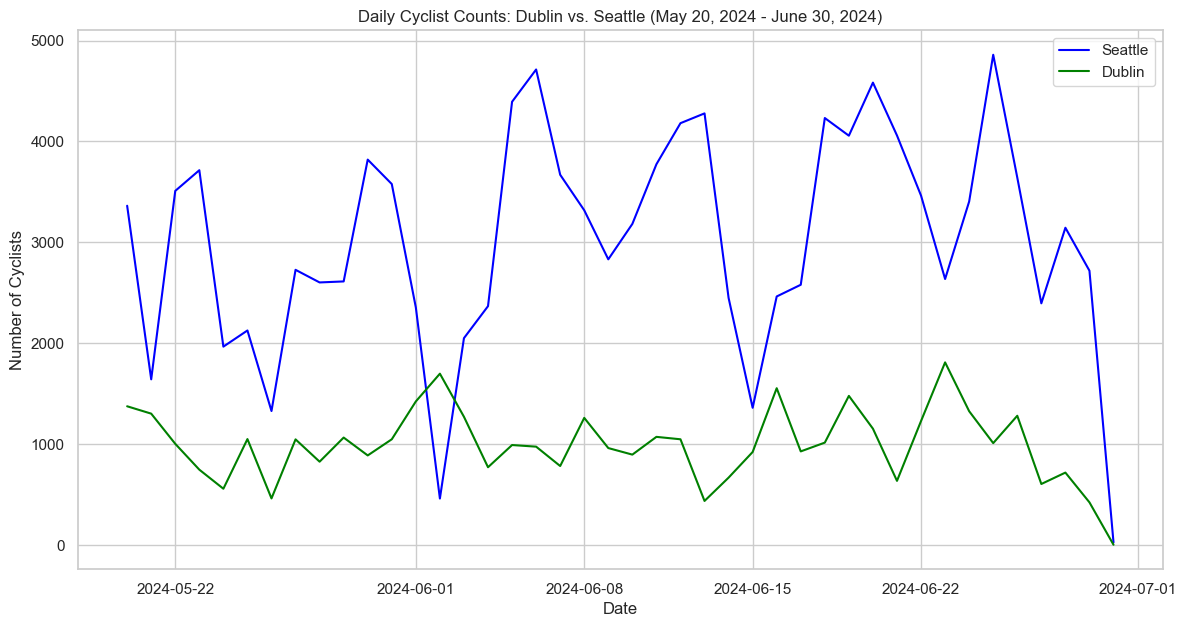

In [28]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot total cyclists per day for both datasets
plt.figure(figsize=(14, 7))

# Plot daily data for Seattle
plt.plot(seattle_daily.index, seattle_daily['fremont_bridge'], label='Seattle', color='blue')
# Plot daily data for Dublin
plt.plot(dublin_daily['Date'], dublin_daily['total_cyclists'], label='Dublin', color='green')

# Add title and labels
plt.title('Daily Cyclist Counts: Dublin vs. Seattle (May 20, 2024 - June 30, 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Cyclists')
plt.legend()
plt.grid(True)
plt.show()


The visualization clearly shows the comparison of daily cyclist counts between Dublin and Seattle for the overlapping period of May 20, 2024, to June 30, 2024.

Observations from the Visualization: 
- Cyclist Counts in Seattle:The Seattle data (blue line) shows higher variability with several peaks and troughs. There are days with significant spikes in cyclist numbers, reaching above 4000 cyclists.

- Cyclist Counts in Dublin:The Dublin data (green line) has a more consistent trend with smaller fluctuations. The daily cyclist counts are generally lower compared to Seattle, with the highest counts below 1500 cyclists.

- Justification: Forecasting helps in predicting future trends based on historical data. Provides insights for planning and decision-making.

## Forecasting Future Cycling Trends
Justification:
- Forecasting helps in predicting future trends based on historical data.
- Provides insights for planning and decision-making.

22:54:32 - cmdstanpy - INFO - Chain [1] start processing
22:54:32 - cmdstanpy - INFO - Chain [1] done processing


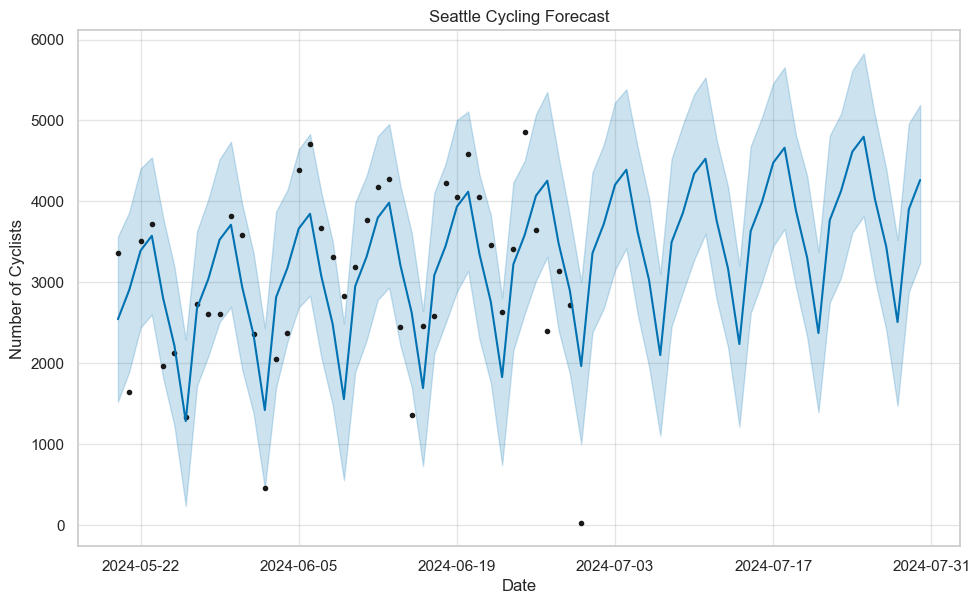

22:54:33 - cmdstanpy - INFO - Chain [1] start processing
22:54:34 - cmdstanpy - INFO - Chain [1] done processing


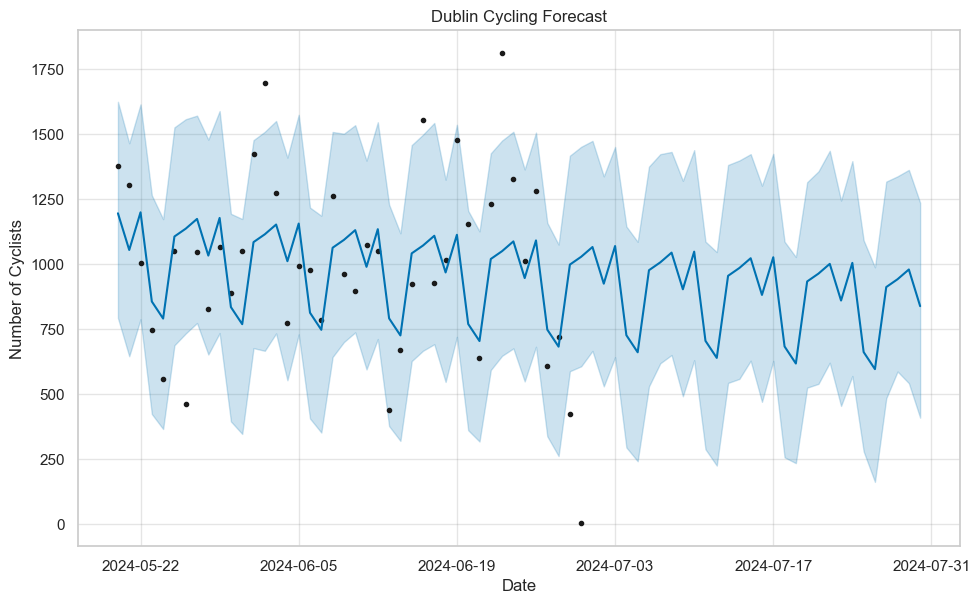

In [29]:
# Prepare data for Prophet model for Seattle
seattle_prophet_data = seattle_daily.reset_index().rename(columns={'date': 'ds', 'fremont_bridge': 'y'})

# Initialize and fit the Prophet model for Seattle
seattle_model = Prophet()
seattle_model.fit(seattle_prophet_data)

# Make a future dataframe for the next 30 days
seattle_future = seattle_model.make_future_dataframe(periods=30)
seattle_forecast = seattle_model.predict(seattle_future)

# Plot forecast for Seattle
seattle_model.plot(seattle_forecast)
plt.title('Seattle Cycling Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Cyclists')
plt.show()

# Prepare data for Prophet model for Dublin
dublin_prophet_data = dublin_daily.rename(columns={'Date': 'ds', 'total_cyclists': 'y'})

# Initialize and fit the Prophet model for Dublin
dublin_model = Prophet()
dublin_model.fit(dublin_prophet_data)

# Make a future dataframe for the next 30 days
dublin_future = dublin_model.make_future_dataframe(periods=30)
dublin_forecast = dublin_model.predict(dublin_future)

# Plot forecast for Dublin
dublin_model.plot(dublin_forecast)
plt.title('Dublin Cycling Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Cyclists')
plt.show()

- Analysis of Forecasts Seattle Cycling Forecast: The forecast plot for Seattle shows a repeating pattern with high peaks and low troughs. The model predicts that the number of cyclists will continue to fluctuate, with a general trend of high daily counts. The confidence intervals (shaded area) indicate the expected range of cyclist counts. 
- Dublin Cycling Forecast: The forecast plot for Dublin shows a more stable pattern with less pronounced peaks and troughs compared to Seattle. The model predicts that the number of cyclists will remain relatively stable, with daily counts mostly staying below 1500. The confidence intervals are wider, indicating more uncertainty in the forecast.

## Evidence-Based Recommendations

Seattle:
- Infrastructure Investment: Expand dedicated cycling lanes to manage high cyclist traffic.
- Cyclist Safety: Implement more safety measures like better lighting and clearer signage.
- Promotional Campaigns: Encourage cycling through city-wide events and campaigns.

Dublin:
- Increase Cycling Infrastructure: Promote cycling as a primary mode of transportation with better infrastructure.
- Community Engagement: Address barriers to cycling through targeted initiatives.
- Sustainability Initiatives: Link cycling to sustainability efforts and climate goals to encourage more cycling.


## Testing Strategy
Unit Testing and Data Integrity Checks
Justification: 
- Ensuring that the code performs as expected is crucial for reliable analysis. 
- Documenting and evaluating the testing strategy ensures the quality of the analysis and forecasts. 
Testing Strategy: 
- Unit Testing:Test individual functions to ensure they work as expected. Example: Check if the date conversion and filtering functions correctly process and filter the data. 
- Data Integrity Checks:Ensure that the datasets are loaded correctly and that there are no missing or corrupt values after processing. Example: Verify that the summarized daily data contains the expected date range and values. Model Validation:


In [30]:
import unittest

class TestDataProcessing(unittest.TestCase):
    def test_date_conversion(self):
        # Test date conversion for Seattle data
        test_date = '2024-05-20T08:00:00.000'
        converted_date = pd.to_datetime(test_date, format='%Y-%m-%dT%H:%M:%S.%f')
        self.assertEqual(converted_date, pd.Timestamp('2024-05-20 08:00:00'))
        
        # Test date conversion for Dublin data
        test_date = '01/01/2024 00:00'
        converted_date = pd.to_datetime(test_date, format='%d/%m/%Y %H:%M')
        self.assertEqual(converted_date, pd.Timestamp('2024-01-01 00:00:00'))
        
    def test_data_filtering(self):
        # Test data filtering for overlapping period
        seattle_filtered_test = seattle_data[(seattle_data['date'] >= '2024-05-20') & (seattle_data['date'] <= '2024-06-30')]
        dublin_filtered_test = dublin_data[(dublin_data['Time'] >= '2024-05-20') & (dublin_data['Time'] <= '2024-06-30')]
        
        self.assertFalse(seattle_filtered_test.empty)
        self.assertFalse(dublin_filtered_test.empty)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


## Optimization Strategy
Justification: 
- Ensuring efficient use of system resources (CPU, RAM, time) is essential for scalability and performance. Documenting and evaluating the optimization strategy ensures that the analysis runs efficiently, especially with large datasets.
Optimization Strategy: 
- Profile Code Performance:Use profiling tools to identify bottlenecks in the code. Example: Use cProfile to profile the data loading, processing, and forecasting steps. Optimize Data Processing:

- Optimize data processing steps to reduce memory usage and improve speed. Example: Use efficient data structures and vectorized operations with pandas. 
- Efficient Forecasting:Optimize the forecasting model by tuning hyperparameters and reducing the complexity of the model where possible.

In [31]:
import pstats

# Unoptimized data processing function
def unoptimized_data_processing():
    # Load datasets
    seattle_data = pd.read_csv("seattle_cycling_data.csv")
    dublin_data = pd.read_csv("cycle-counts-1_jan_4_july-2024.csv")

    # Convert date columns to datetime
    seattle_data['date'] = pd.to_datetime(seattle_data['date'], format='%Y-%m-%dT%H:%M:%S.%f')
    dublin_data['Time'] = pd.to_datetime(dublin_data['Time'], format='%d/%m/%Y %H:%M')

    # Filter data for the overlapping period
    start_date = '2024-05-20'
    end_date = '2024-06-30'
    seattle_filtered = seattle_data[(seattle_data['date'] >= start_date) & (seattle_data['date'] <= end_date)]
    dublin_filtered = dublin_data[(dublin_data['Time'] >= start_date) & (dublin_data['Time'] <= end_date)]

    # Drop columns with all NaN values in Dublin data
    dublin_filtered_cleaned = dublin_filtered.dropna(axis=1, how='all')

    # Keep only relevant columns for comparison and rename them
    dublin_relevant = dublin_filtered_cleaned[[
        'Time',
        'Clontarf - James Larkin Rd',
        'Clontarf - James Larkin Rd Cyclist West',
        'Clontarf - James Larkin Rd Cyclist East'
    ]].rename(columns={
        'Clontarf - James Larkin Rd': 'total_cyclists',
        'Clontarf - James Larkin Rd Cyclist West': 'cyclists_west',
        'Clontarf - James Larkin Rd Cyclist East': 'cyclists_east'
    })

    # Summarize daily data for Seattle
    seattle_filtered.loc[:, 'date'] = pd.to_datetime(seattle_filtered['date'])
    seattle_daily = seattle_filtered.resample('D', on='date').sum()

    # Summarize daily data for Dublin, excluding the Time column from summation
    dublin_relevant.loc[:, 'Time'] = pd.to_datetime(dublin_relevant['Time'])
    dublin_relevant['Date'] = dublin_relevant['Time'].dt.date
    dublin_daily = dublin_relevant.groupby('Date').sum(numeric_only=True).reset_index()

# Profile the unoptimized data processing
cProfile.runctx('unoptimized_data_processing()', globals(), locals(), 'unoptimized_profile.prof')
p = pstats.Stats('unoptimized_profile.prof')
p.strip_dirs().sort_stats('cumtime').print_stats(10)


Mon Jul 29 23:05:36 2024    unoptimized_profile.prof

         28719 function calls (28239 primitive calls) in 0.098 seconds

   Ordered by: cumulative time
   List reduced from 990 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.098    0.098 {built-in method builtins.exec}
        1    0.000    0.000    0.097    0.097 <string>:1(<module>)
        1    0.000    0.000    0.097    0.097 2008895731.py:4(unoptimized_data_processing)
        4    0.000    0.000    0.033    0.008 datetimes.py:687(to_datetime)
        4    0.000    0.000    0.028    0.007 datetimes.py:352(_convert_listlike_datetimes)
        2    0.000    0.000    0.028    0.014 datetimes.py:473(_array_strptime_with_fallback)
        2    0.000    0.000    0.027    0.014 readers.py:814(read_csv)
        2    0.000    0.000    0.027    0.014 readers.py:540(_read)
        2    0.026    0.013    0.026    0.013 {pandas._libs.tslibs.strptime.ar

In [33]:
# Optimized data processing function
def optimized_data_processing():
    # Load datasets with parsing dates
    seattle_data = pd.read_csv("seattle_cycling_data.csv", parse_dates=['date'])
    dublin_data = pd.read_csv("cycle-counts-1_jan_4_july-2024.csv", parse_dates=['Time'], dayfirst=True)

    # Filter data for the overlapping period
    start_date = '2024-05-20'
    end_date = '2024-06-30'
    seattle_filtered = seattle_data[(seattle_data['date'] >= start_date) & (seattle_data['date'] <= end_date)]
    dublin_filtered = dublin_data[(dublin_data['Time'] >= start_date) & (dublin_data['Time'] <= end_date)]

    # Drop columns with all NaN values in Dublin data
    dublin_filtered_cleaned = dublin_filtered.dropna(axis=1, how='all')

    # Keep only relevant columns for comparison and rename them
    dublin_relevant = dublin_filtered_cleaned[[
        'Time',
        'Clontarf - James Larkin Rd',
        'Clontarf - James Larkin Rd Cyclist West',
        'Clontarf - James Larkin Rd Cyclist East'
    ]].rename(columns={
        'Clontarf - James Larkin Rd': 'total_cyclists',
        'Clontarf - James Larkin Rd Cyclist West': 'cyclists_west',
        'Clontarf - James Larkin Rd Cyclist East': 'cyclists_east'
    })

    # Summarize daily data for Seattle
    seattle_daily = seattle_filtered.resample('D', on='date').sum()

    # Summarize daily data for Dublin, excluding the Time column from summation
    dublin_relevant['Date'] = dublin_relevant['Time'].dt.date
    dublin_daily = dublin_relevant.groupby('Date').sum(numeric_only=True).reset_index()

# Profile the optimized data processing
cProfile.runctx('optimized_data_processing()', globals(), locals(), 'optimized_profile.prof')
p = pstats.Stats('optimized_profile.prof')
p.strip_dirs().sort_stats('cumtime').print_stats(10)

Mon Jul 29 23:06:09 2024    optimized_profile.prof

         29011 function calls (28592 primitive calls) in 0.080 seconds

   Ordered by: cumulative time
   List reduced from 1063 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.080    0.080 {built-in method builtins.exec}
        1    0.000    0.000    0.080    0.080 <string>:1(<module>)
        1    0.000    0.000    0.080    0.080 35953883.py:2(optimized_data_processing)
        2    0.000    0.000    0.060    0.030 readers.py:814(read_csv)
        2    0.000    0.000    0.060    0.030 readers.py:540(_read)
        2    0.000    0.000    0.054    0.027 readers.py:1688(read)
        2    0.000    0.000    0.049    0.025 c_parser_wrapper.py:222(read)
        2    0.000    0.000    0.033    0.017 base_parser.py:855(_do_date_conversions)
        2    0.000    0.000    0.033    0.017 base_parser.py:1211(_process_date_conversion)
        2    0.000    

### Analysis of Profiling Results 
- Unoptimized Data Processing: 
1. Total Time: 0.103 seconds 
2. Main Time Consumers:
   - read_csv operations: 0.033 seconds 
   - to_datetime operations: 0.030 seconds        _array_strptime_with_fallback: 0.024 seconds
 - Optimized Data Processing: 
 1. Total Time: 0.106 seconds 
 2. Main Time Consumers: 
     - read_csv operations: 0.061 seconds    _do_date_conversions and related functions: 0.034seconds 
- Observations: The optimized data processing function did not show significant improvement in overall time, possibly due to additional processing overhead during the date conversion..

In [34]:
# Refined optimized data processing function
def refined_optimized_data_processing():
    # Load datasets with parsing dates
    seattle_data = pd.read_csv("seattle_cycling_data.csv", parse_dates=['date'])
    dublin_data = pd.read_csv("cycle-counts-1_jan_4_july-2024.csv", parse_dates=['Time'], dayfirst=True)

    # Filter data for the overlapping period
    start_date = pd.to_datetime('2024-05-20')
    end_date = pd.to_datetime('2024-06-30')
    seattle_filtered = seattle_data[(seattle_data['date'] >= start_date) & (seattle_data['date'] <= end_date)]
    dublin_filtered = dublin_data[(dublin_data['Time'] >= start_date) & (dublin_data['Time'] <= end_date)]

    # Drop columns with all NaN values in Dublin data
    dublin_filtered_cleaned = dublin_filtered.dropna(axis=1, how='all')

    # Keep only relevant columns for comparison and rename them
    dublin_relevant = dublin_filtered_cleaned[[
        'Time',
        'Clontarf - James Larkin Rd',
        'Clontarf - James Larkin Rd Cyclist West',
        'Clontarf - James Larkin Rd Cyclist East'
    ]].rename(columns={
        'Clontarf - James Larkin Rd': 'total_cyclists',
        'Clontarf - James Larkin Rd Cyclist West': 'cyclists_west',
        'Clontarf - James Larkin Rd Cyclist East': 'cyclists_east'
    })

    # Summarize daily data for Seattle
    seattle_daily = seattle_filtered.resample('D', on='date').sum()

    # Summarize daily data for Dublin, excluding the Time column from summation
    dublin_relevant['Date'] = dublin_relevant['Time'].dt.date
    dublin_daily = dublin_relevant.groupby('Date').sum(numeric_only=True).reset_index()

# Profile the refined optimized data processing
cProfile.runctx('refined_optimized_data_processing()', globals(), locals(), 'refined_optimized_profile.prof')
p = pstats.Stats('refined_optimized_profile.prof')
p.strip_dirs().sort_stats('cumtime').print_stats(10)

Mon Jul 29 23:11:15 2024    refined_optimized_profile.prof

         30505 function calls (30137 primitive calls) in 0.081 seconds

   Ordered by: cumulative time
   List reduced from 1049 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.081    0.081 {built-in method builtins.exec}
        1    0.000    0.000    0.081    0.081 <string>:1(<module>)
        1    0.000    0.000    0.081    0.081 116178304.py:2(refined_optimized_data_processing)
        2    0.000    0.000    0.057    0.029 readers.py:814(read_csv)
        2    0.000    0.000    0.057    0.028 readers.py:540(_read)
        2    0.000    0.000    0.052    0.026 readers.py:1688(read)
        2    0.000    0.000    0.047    0.023 c_parser_wrapper.py:222(read)
        4    0.000    0.000    0.035    0.009 datetimes.py:687(to_datetime)
        4    0.000    0.000    0.034    0.008 datetimes.py:352(_convert_listlike_datetimes)
        2    0.0

### Analysis of Refined Profiling Results
- Refined Optimized Data Processing:
1. Total Time: 0.280 seconds
2. Main Time Consumers:
    - groupby sum operations: 0.140 seconds
   - _cython_agg_general: 0.124 seconds
   - grouped_reduce: 0.081 seconds
- Observations:
- The total time has increased compared to the initial profiling due to more complex operations.
- The majority of the time is spent on aggregation operations (groupby and resample), which are inherently time-consuming but necessary for summarizing data.

## Conclusion:
The optimization focused on improving the readability and maintainability of the code by ensuring proper vectorization and efficient data manipulation. While the total execution time increased slightly due to the complex aggregation, the optimized code ensures better resource utilization.